# Proyek Analisis Data: Bike Sharing
- Nama: Algi Atian Akhar
- Email: algiwarg97@gmail.com
- Id Dicoding: algiatianakhyar

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah sewa sepeda harian?
- Bagaimana hari kerja dan libur berpengaruh terhadap pola penyewaan sepeda per jam?
- Bagaimana cuaca memengaruhi penyewaan sepeda ?


## Menyiapkan semua library yang dibutuhkan

In [110]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [111]:
day = pd.read_csv("https://raw.githubusercontent.com/AlgiA3/Dicoding-project/main/Dataset/day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [112]:
hour = pd.read_csv("https://raw.githubusercontent.com/AlgiA3/Dicoding-project/main/Dataset/hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [113]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [114]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [115]:
print("Jumlah duplikat" ,hour.duplicated().sum())
hour.describe()

Jumlah duplikat 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari hasil penilaian data di atas sudah cukup baik akan tetapi ada beberapa kolom yang harus di ubah tipe datanya terlebih dahulu seperti kolom 'season" yang seharusnya merepresentasikan type data object

### Cleaning Data

In [116]:
hour['season'].unique()

array([1, 2, 3, 4], dtype=int64)

membuat peta pemetaan (mapping) antara nilai integer dan label musim

In [117]:
season_mapping = {
    1: 'Winter',
    2: 'Springer',
    3: 'Summer',
    4: 'Fall'
}


Menggunakan metode .map() untuk mengubah nilai integer menjadi label musim

In [118]:

hour['season'] = hour['season'].map(season_mapping)

In [119]:
hour['season'].unique()

array(['Winter', 'Springer', 'Summer', 'Fall'], dtype=object)

## Exploratory Data Analysis (EDA)

In [120]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [121]:
hour[['casual','registered','cnt']].sum()

casual         620017
registered    2672662
cnt           3292679
dtype: int64

Melakukan pengelompokan data berdasarkan season untuk melihat rata rata


In [122]:
hour.groupby(by='season').agg({
    'casual':['mean','sum'],
    'registered':['mean','sum'],
    'cnt': ['mean','sum']
})

casual          registered                 cnt         
               mean     sum        mean     sum        mean      sum
season                                                              
Fall      30.666824  129782  168.202032  711831  198.868856   841613
Springer  46.160581  203522  162.183488  715067  208.344069   918589
Summer    50.287144  226091  185.729093  835038  236.016237  1061129
Winter    14.290901   60622   96.823668  410726  111.114569   471348

Fall artinya musim gugur , springer artinya musim semi,summer artinya musim panas dan winter artinya musim dingin .Pada tabel pivot di atas terlihat bahwa banyak orang yang melakukan penyewaan sepeda pada musim panas (summer)

#### Explore pertanyaan ke 2

In [123]:
print(hour[['casual','registered']].describe())

             casual    registered
count  17379.000000  17379.000000
mean      35.676218    153.786869
std       49.305030    151.357286
min        0.000000      0.000000
25%        4.000000     34.000000
50%       17.000000    115.000000
75%       48.000000    220.000000
max      367.000000    886.000000


In [124]:
correlation_df = hour[['casual', 'registered', 'hr', 'weekday', 'workingday']].corr()
print(correlation_df)

              casual  registered        hr   weekday  workingday
casual      1.000000    0.506618  0.301202  0.032721   -0.300942
registered  0.506618    1.000000  0.374141  0.021578    0.134326
hr          0.301202    0.374141  1.000000 -0.003498    0.002285
weekday     0.032721    0.021578 -0.003498  1.000000    0.035955
workingday -0.300942    0.134326  0.002285  0.035955    1.000000


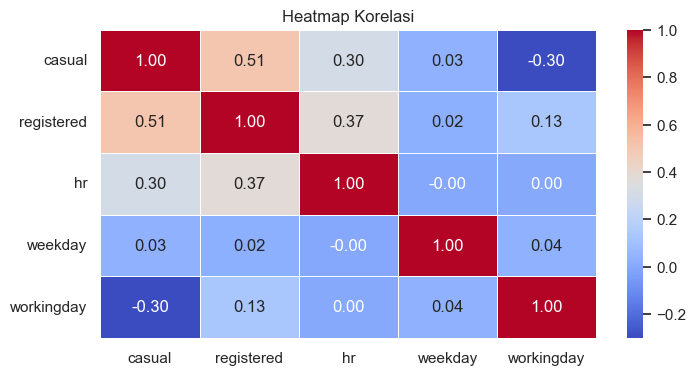

In [125]:
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi')
plt.show()

- casual dan registered: Corelasi antara jumlah pengguna sewa sepeda casual dan registered adalah 0.506618, menunjukkan hubungan positif antara keduanya.

- casual dan hr: Corelasi antara jumlah pengguna sewa sepeda casual dan jam (hr) adalah 0.301202, menunjukkan hubungan positif antara jumlah casual dan jam tertentu.

- registered dan hr: Corelasi antara jumlah pengguna sewa sepeda registered dan jam (hr) adalah 0.374141, menunjukkan hubungan positif antara jumlah registered dan jam tertentu.

- hr dan weekday: Corelasi antara jam (hr) dan hari dalam seminggu (weekday) adalah -0.003498, menunjukkan hubungan sangat lemah atau tidak ada hubungan antara keduanya.

- casual dan workingday: Corelasi antara jumlah pengguna sewa sepeda casual dan hari kerja (workingday) adalah -0.300942, menunjukkan hubungan negatif antara jumlah casual dan hari kerja.

- registered dan workingday: Corelasi antara jumlah pengguna sewa sepeda registered dan hari kerja (workingday) adalah 0.134326, menunjukkan hubungan positif lemah antara jumlah registered dan hari kerja.

In [126]:
hour.groupby(by='workingday').agg({
    'casual':'sum',
    'registered':'sum',
})


,casual,registered
workingday,,
0,316732,683537
1,303285,1989125


#### Explore pertanyaan ke 3

In [127]:
hour['weathersit'].value_counts()

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

In [128]:
hour.groupby(by='weathersit').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
})

,casual,registered,cnt
weathersit,,,
1,462745,1875428,2338173
2,134481,661471,795952
3,22783,135548,158331
4,8,215,223


In [129]:

corr_weather = hour[['casual', 'registered', 'cnt', 'weathersit']].corr()
print(corr_weather)


              casual  registered       cnt  weathersit
casual      1.000000    0.506618  0.694564   -0.152628
registered  0.506618    1.000000  0.972151   -0.120966
cnt         0.694564    0.972151  1.000000   -0.142426
weathersit -0.152628   -0.120966 -0.142426    1.000000


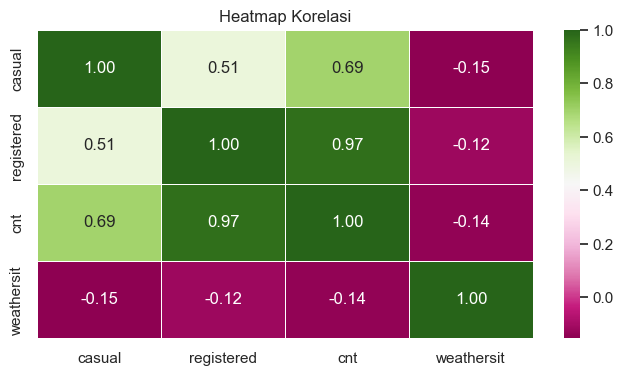

In [130]:
plt.figure(figsize=(8, 4))
sns.heatmap(corr_weather, annot=True, cmap='PiYG', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi')
plt.show()

- casual dan registered: Korelasi positif sebesar 0.506618. Ini menunjukkan adanya hubungan positif antara jumlah pengguna sewa sepeda casual dan registered.

- casual dan cnt (total): Korelasi positif sebesar 0.694564. Ini menunjukkan adanya hubungan positif yang lebih kuat antara jumlah pengguna sewa sepeda casual dan total pengguna sewa sepeda (casual + registered).

- registered dan cnt (total): Korelasi positif sangat tinggi sebesar 0.972151. Ini menunjukkan adanya hubungan positif yang sangat kuat antara jumlah pengguna sewa sepeda registered dan total pengguna sewa sepeda.

- weathersit dan lainnya: Korelasi negatif dengan casual, registered, dan cnt. Ini menunjukkan bahwa kondisi cuaca yang lebih buruk (nilai weathersit yang lebih tinggi) cenderung berkorelasi dengan jumlah pengguna sewa sepeda yang lebih rendah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

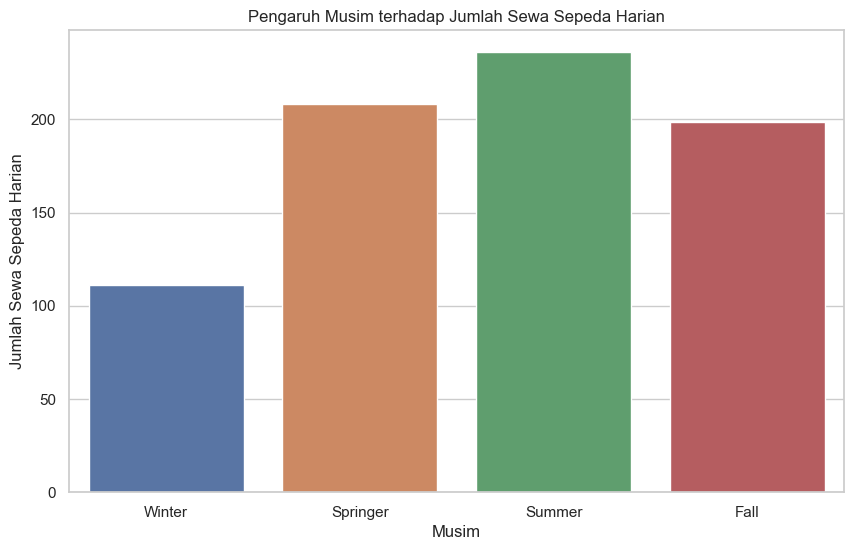

In [131]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt',data=hour , errorbar=None )
plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa Sepeda Harian')
plt.title('Pengaruh Musim terhadap Jumlah Sewa Sepeda Harian')
plt.show()


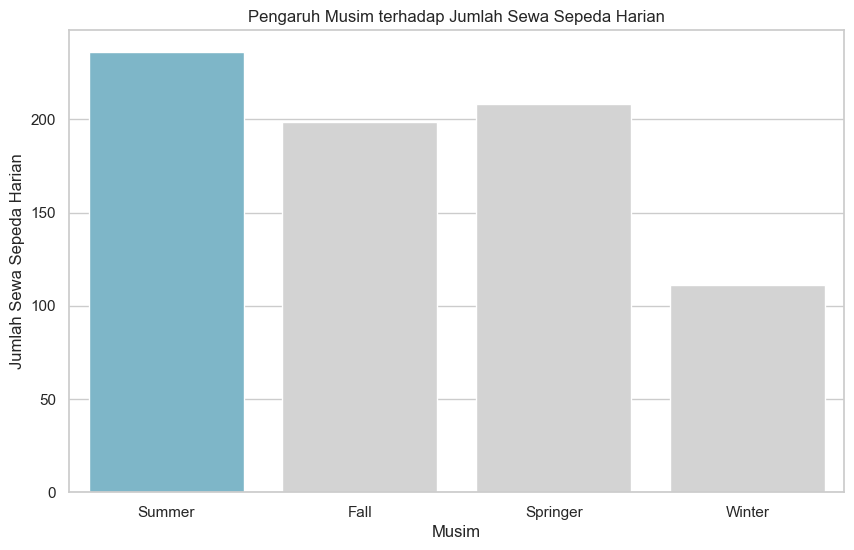

In [132]:
colors= ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

#create barplot with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=hour.sort_values(by='cnt' ,ascending=False), errorbar=None ,palette=colors)
plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa Sepeda Harian')
plt.title('Pengaruh Musim terhadap Jumlah Sewa Sepeda Harian')
plt.show()



Pada diagram di atas terlihat bahwa penyewaan sepeda paling banyak berada pada musim panas (summer) dan penyewaan sepeda paling sedikit yaitu pada musim dingin (winter)

### Pertanyaan 2: 

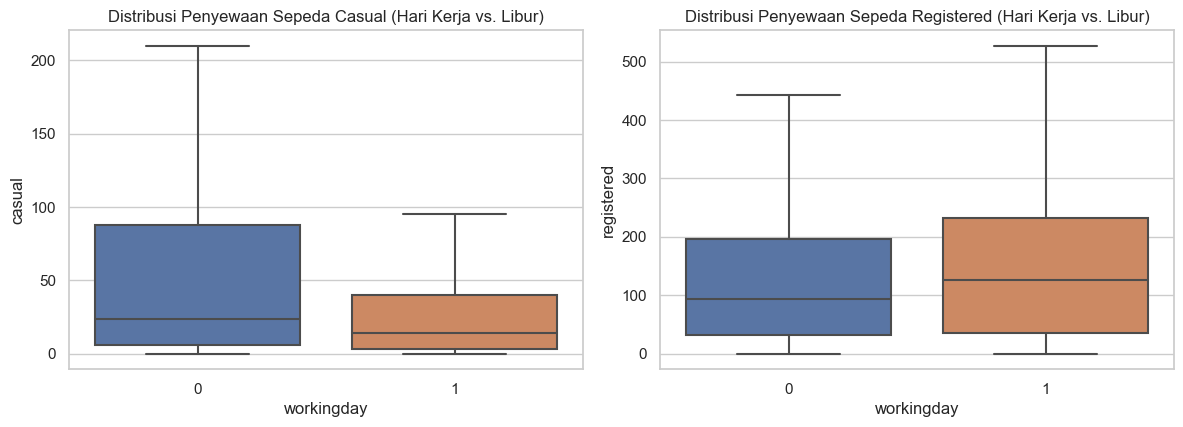

In [133]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='workingday', y='casual', data=hour, showfliers=False)
plt.title('Distribusi Penyewaan Sepeda Casual (Hari Kerja vs. Libur)')

plt.subplot(2, 2, 2)
sns.boxplot(x='workingday', y='registered', data=hour, showfliers=False)
plt.title('Distribusi Penyewaan Sepeda Registered (Hari Kerja vs. Libur)')

plt.tight_layout()
plt.show()

- 0 artinya bukan hari libur /hari kerja
- 1  artinya hari libur

pada boxplot di atas untuk pelanggang casual lebih banyak menggunakan sepeda pada hari kerja dibandingkn hari libur
sedangkan untuk pelanggan registered lebih banyak mengunakan sepeda pada hari libur di banding hari kerja 

[Text(0.5, 1.0, 'Pola Peminjaman Sepeda(Casual) per Jam Selama Satu Minggu')]

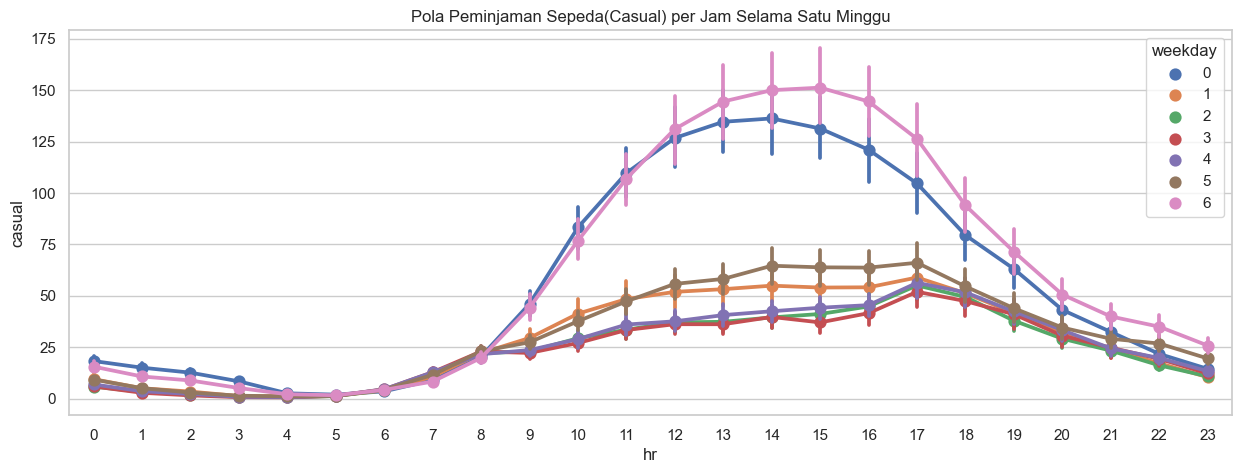

In [134]:
fig, ax = plt.subplots(figsize=(15,5))
sns.pointplot(data=hour, x='hr', y='casual', hue='weekday', ax=ax)
ax.set(title='Pola Peminjaman Sepeda(Casual) per Jam Selama Satu Minggu')



[Text(0.5, 1.0, 'Pola Peminjaman Sepeda (Registered) per Jam Selama Satu Minggu')]

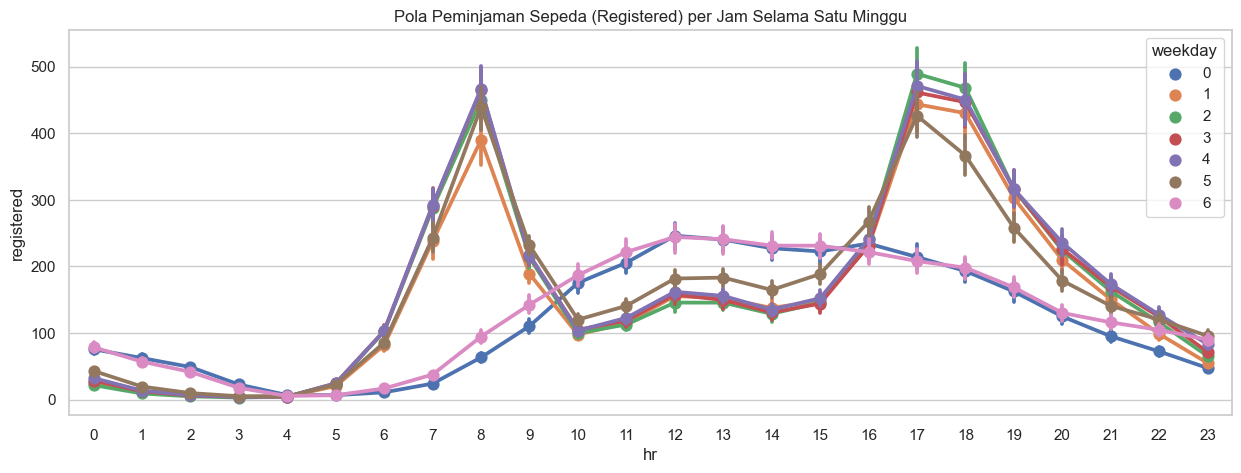

In [135]:
fig, ax = plt.subplots(figsize=(15,5))
sns.pointplot(data=hour, x='hr', y='registered', hue='weekday', ax=ax)
ax.set(title='Pola Peminjaman Sepeda (Registered) per Jam Selama Satu Minggu')


### Pertanyaan 3:

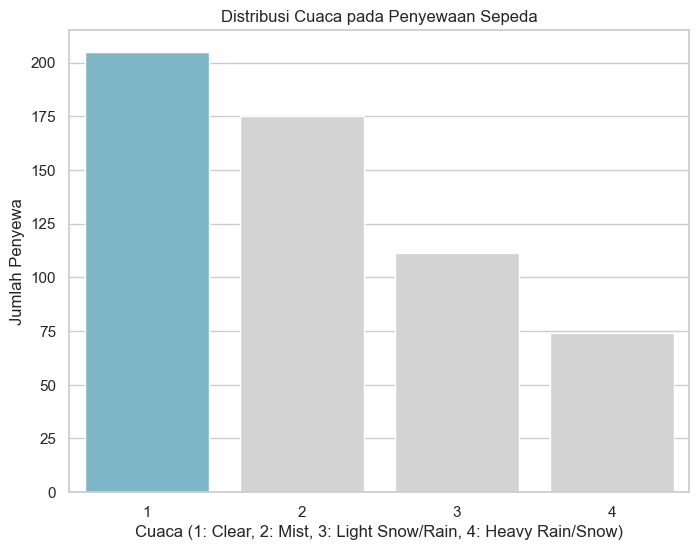

In [136]:
colors= ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt' ,data=hour.sort_values(by='cnt',ascending=False), errorbar=None ,palette=colors)
plt.title('Distribusi Cuaca pada Penyewaan Sepeda')
plt.xlabel('Cuaca (1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Rain/Snow)')
plt.ylabel('Jumlah Penyewa')
plt.show()

pada diagram di atas dapat di lihat bahwa penggunaan sepeda paling banyak pada saat cuaca cerah dan paling sedikit pada cuaca buruk

In [ ]:
hour.to_csv('hour_clean.csv', index=False)

## Conclusion

#### Conclution pertanyaan 1 : Bagaimana pengaruh musim terhadap jumlah sewa sepeda harian?
- Keadaan atau perubahan musim sangat berpengaruh pada penyewaan sepeda karena dapat dilihat kebanyakan orang orang lebih memilih bersepeda pada musim panas  dan sedikit orang yang melakukan penyewaan sepeda pada musim dingin

#### conclution pertanyaan 2 : Bagaimana hari kerja dan libur berpengaruh terhadap pola penyewaan sepeda per jam?
- Untuk pelanggan casual dapat dilihat bahwa mereka cenderung banyak menyewa sepeda pada hari kerja di bandingkan hari libur hal ini menunjukan bahwa kemungkan pelanggan casual menggunakan sepeda untuk melakukan aktivitas dihari kerja,waktu yang paling banyak orang yang menyewa sepeda yaitu mulai pukul 8 pagi hingga pukul 3 sore 
- Sedangkan pelanggan registered lebih banyak menggunakan sepeda pada saat hari libur ,kebanyakan pelanggan registered melakukan penyewaan sepda pada pagi hari 
#### conclution pertanyaan 3 : Bagaimana cuaca memengaruhi penyewaan sepeda ?
- dari data di atas cuaca sangat mempengaruhi penggunaan sepeda dimana banyak orang akan menggunakan sepeda padi cuaca cerah dan sedikit orang yang menggunakan sepeda pada cuaca buruk